In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import DATA

In [2]:
data=pd.read_csv('data\stud.csv')

show top 5 records

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.shape

(1000, 8)

In [7]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
#ata.drop_duplicates

In [17]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
categorical_features=[feature for feature in data if data[feature].dtype=='object']

In [21]:
for feature in categorical_features:
    print(f" Categories in {feature} variable: ")
    print(data[feature].unique())
    print('***************************************************************')

 Categories in gender variable: 
['female' 'male']
***************************************************************
 Categories in race_ethnicity variable: 
['group B' 'group C' 'group A' 'group D' 'group E']
***************************************************************
 Categories in parental_level_of_education variable: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
***************************************************************
 Categories in lunch variable: 
['standard' 'free/reduced']
***************************************************************
 Categories in test_preparation_course variable: 
['none' 'completed']
***************************************************************


In [22]:
numerical_features=[feature for feature in data if data[feature].dtype!='object']

In [23]:
print(f"we have {len(numerical_features)} numerical features")
print(f"we have {len(categorical_features)} categorical features")

we have 3 numerical features
we have 5 categorical features


In [24]:
data['Total Score']=data['math_score']+data['writing_score']+data['reading_score']
data['Average']=data['Total Score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full=data[data['reading_score']==100]['Average'].count()
writing_full=data[data['writing_score']==100]['Average'].count()
math_full=data[data['math_score']==100]['Average'].count()


print(f"number of studets having full marks in maths: {math_full}")
print(f"number of studets having full marks in writing: {writing_full}")
print(f"number of studets having full marks in reading: {reading_full}")


number of studets having full marks in maths: 7
number of studets having full marks in writing: 14
number of studets having full marks in reading: 17


In [27]:
reading_less_20=data[data['reading_score']<=20]['Average'].count()
writing_less_20=data[data['writing_score']<=20]['Average'].count()
math_less_20=data[data['math_score']<=20]['Average'].count()

print(f"number of students having marks less than 20 in math : {math_less_20}")
print(f"number of students having marks less than 20 in reading : {reading_less_20}")
print(f"number of students having marks less than 20 in writing : {writing_less_20}")

number of students having marks less than 20 in math : 4
number of students having marks less than 20 in reading : 1
number of students having marks less than 20 in writing : 3


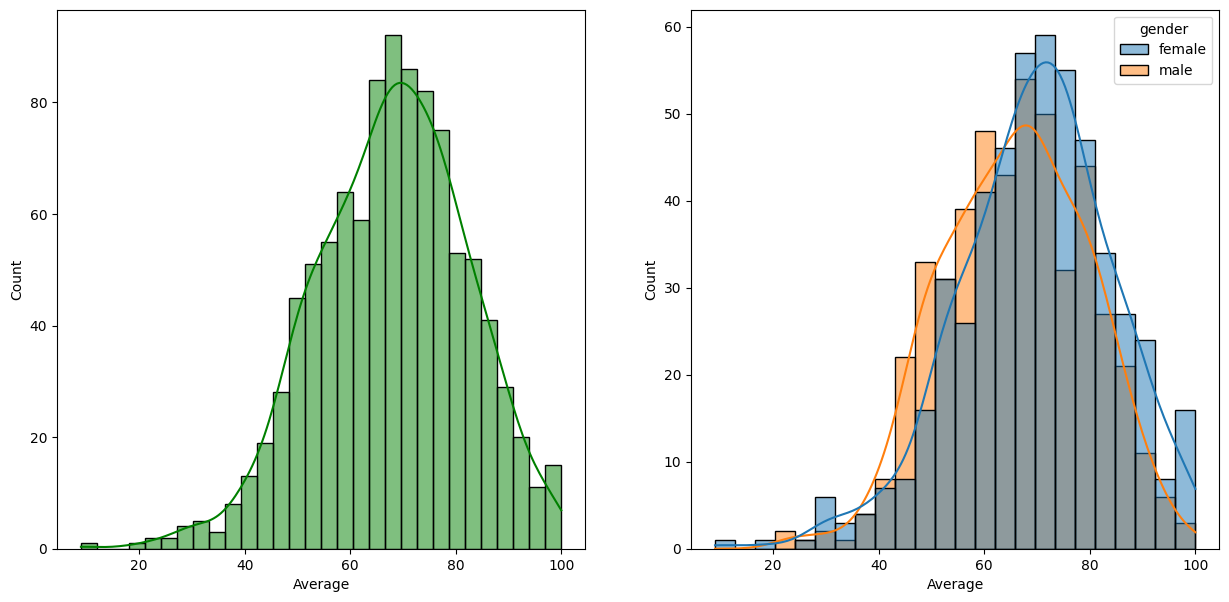

In [28]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='gender')
plt.show()

female students tend to perform better than male students

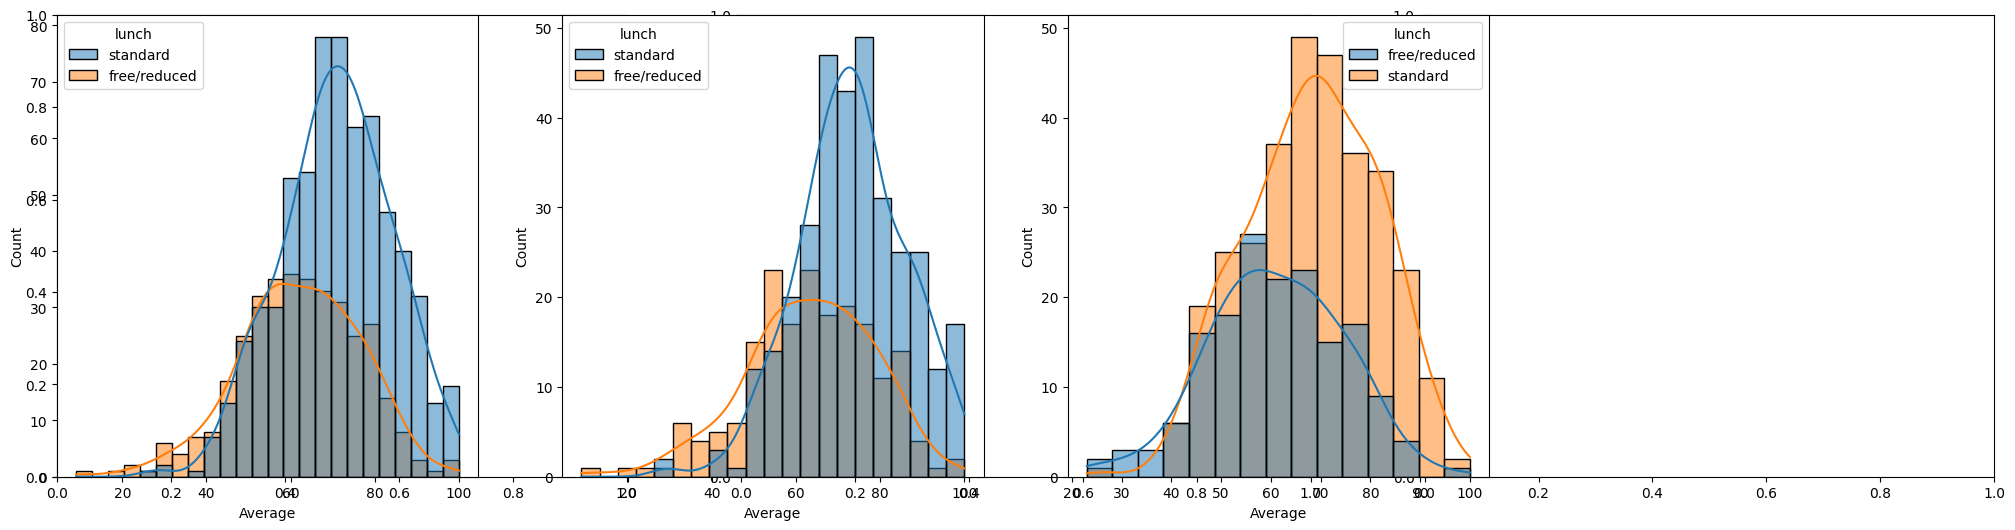

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

standard lunch helps perform well in exams
standard helps perform well whether it would be male or female

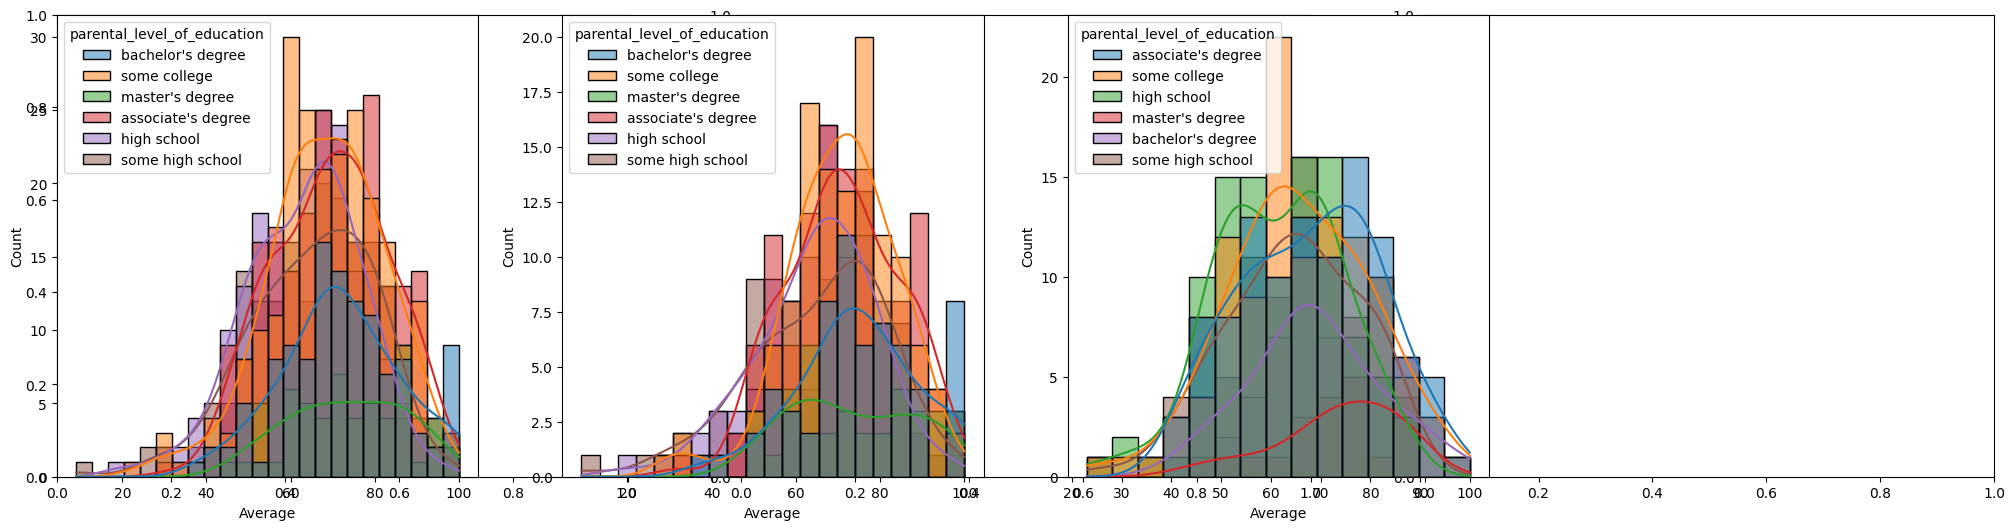

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

the students whose parental had some college level of education tend to perform well

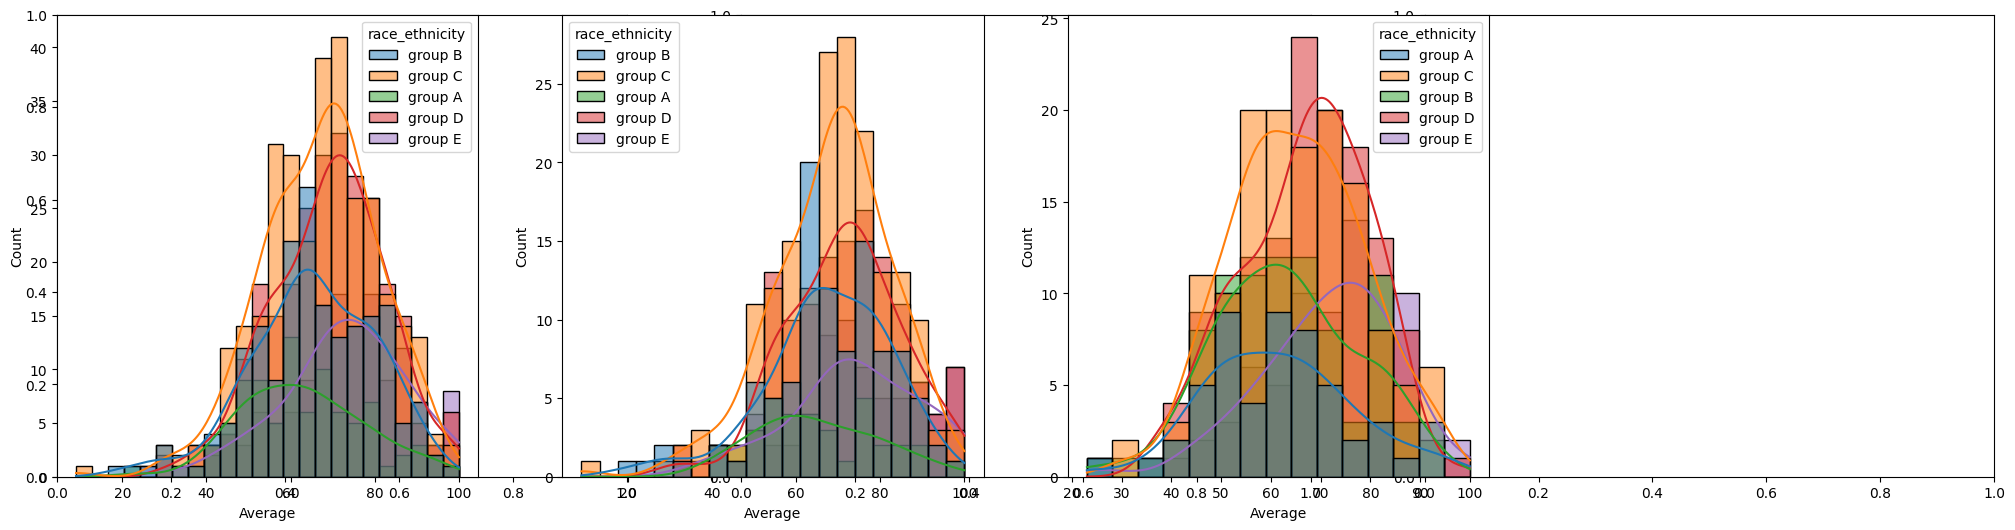

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

Group C tend to perform well in overall exam
in feamle group C performed well and in males group D perfromed well

Maximum score of students in each subject

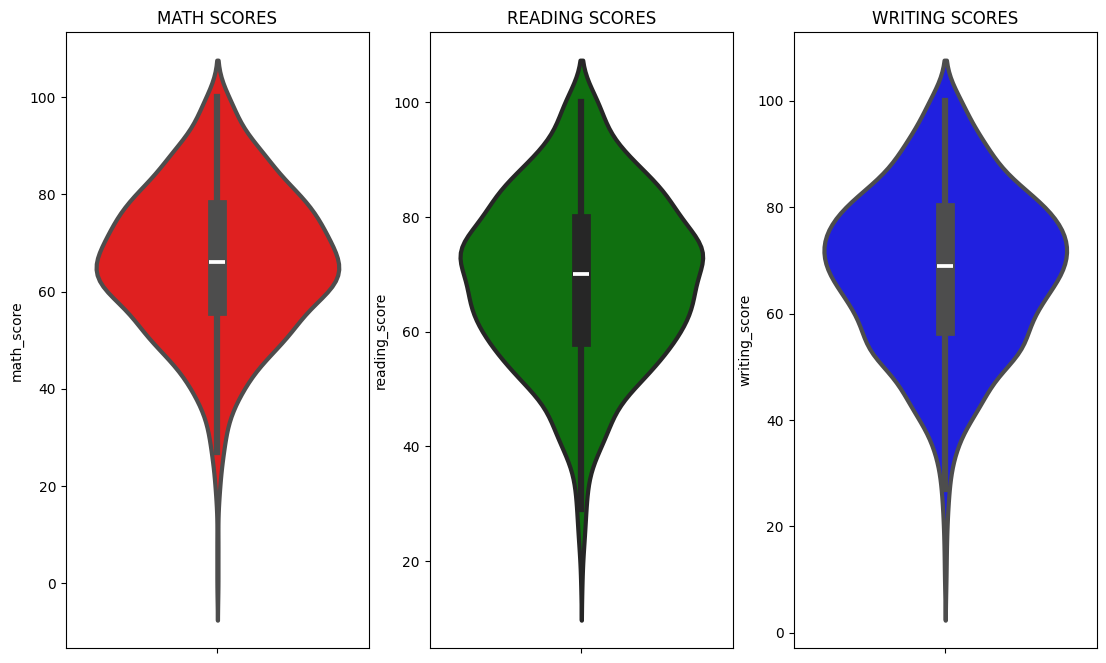

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate Analysis

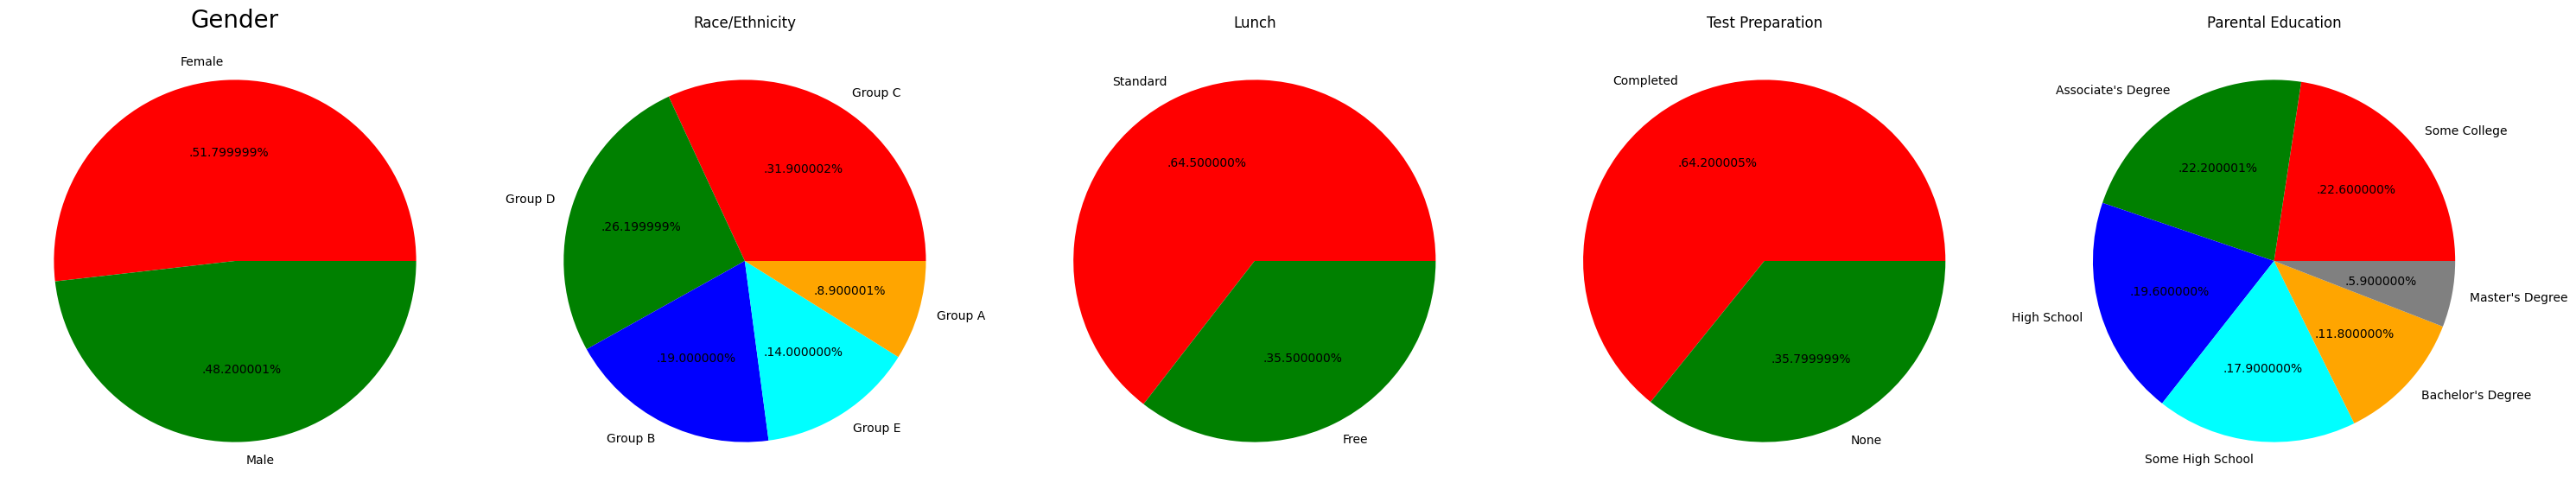

In [40]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=data['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct = '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(1,5,3)
size=data['lunch'].value_counts()
labels='Standard','Free'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1,5,4)
size=data['test_preparation_course'].value_counts()
labels='Completed','None'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Preparation')
plt.axis('off')

plt.subplot(1,5,5)
size=data['parental_level_of_education'].value_counts()
labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Number of male and female students are almost equal
Group C and Group have the highest population
Most of the students have standard lunch
Most of the students have completed test preparation course
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature wise Visualization

Gender

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

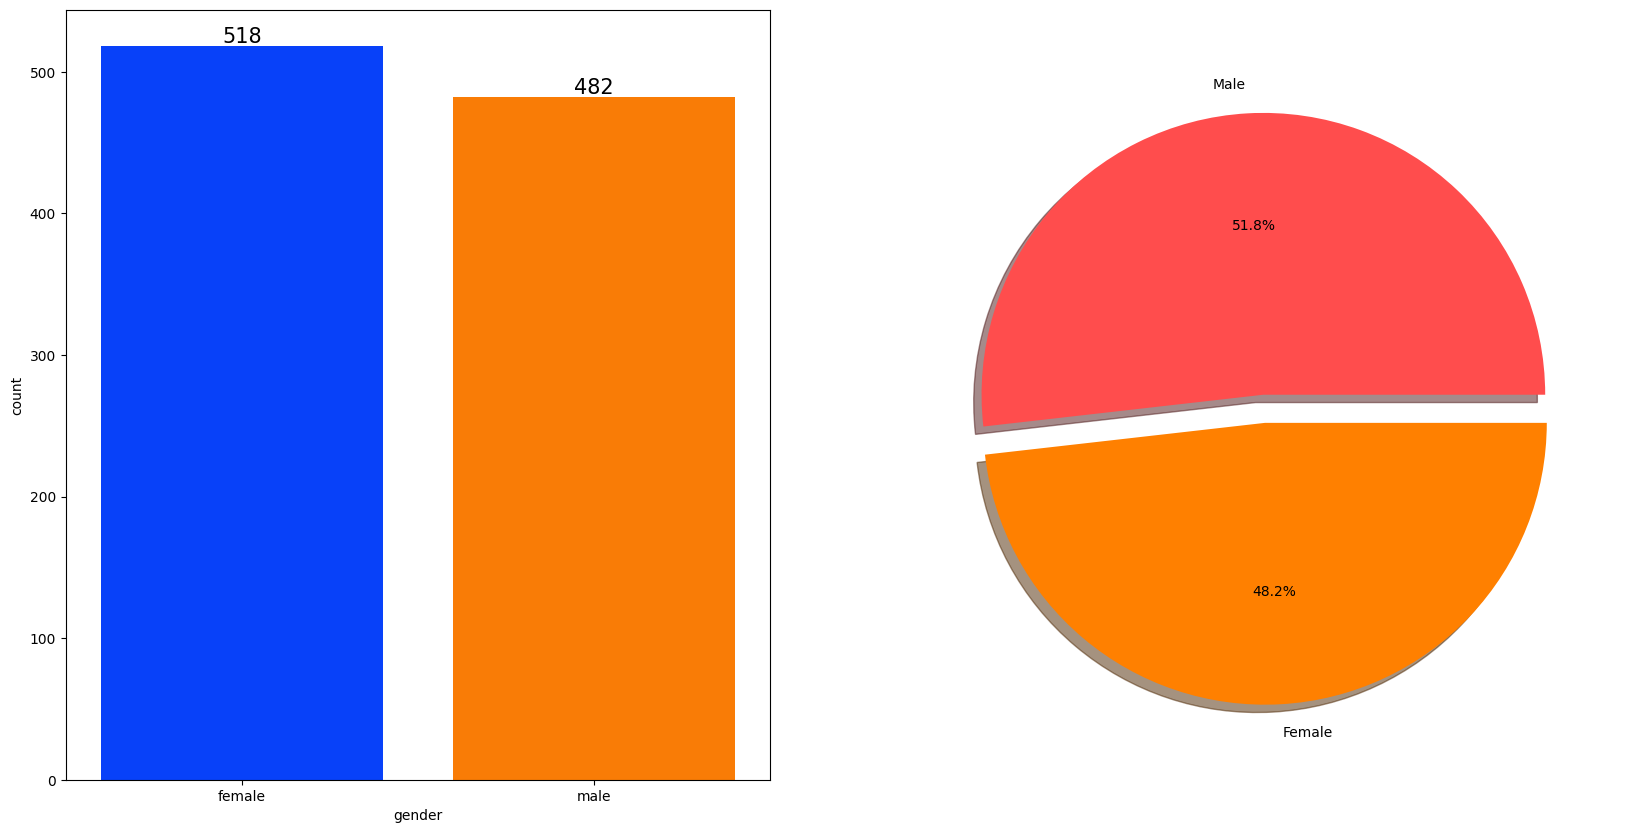

In [45]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=data,x=data['gender'],palette='bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)

plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Bivariate analysis

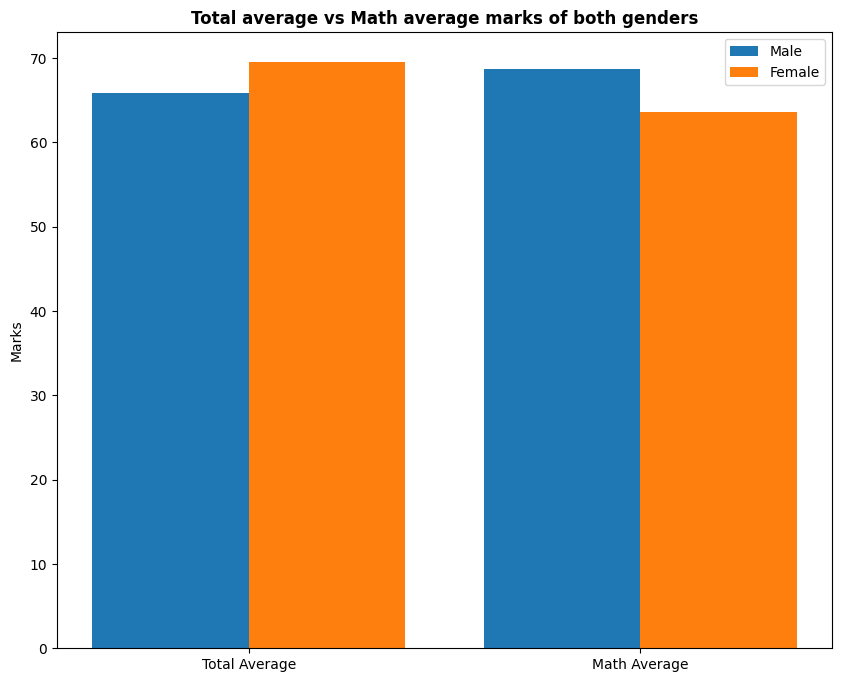

In [64]:
# Ensure gender column is treated as categorical
data['gender'] = data['gender'].astype('category')



# Calculate mean scores grouped by gender
mean_scores = data.groupby('gender').agg({
    'Average': 'mean',
    'math_score': 'mean'
})

# Extract scores for plotting
female_scores = [mean_scores.loc['female', 'Average'], mean_scores.loc['female', 'math_score']]
male_scores = [mean_scores.loc['male', 'Average'], mean_scores.loc['male', 'math_score']]

# Categories for the x-axis
X = ['Total Average', 'Math Average']
X_axis = np.arange(len(X))

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Customizing the plot
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()

Insights

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

RACE/ETHNICITY

Univariate Analysis

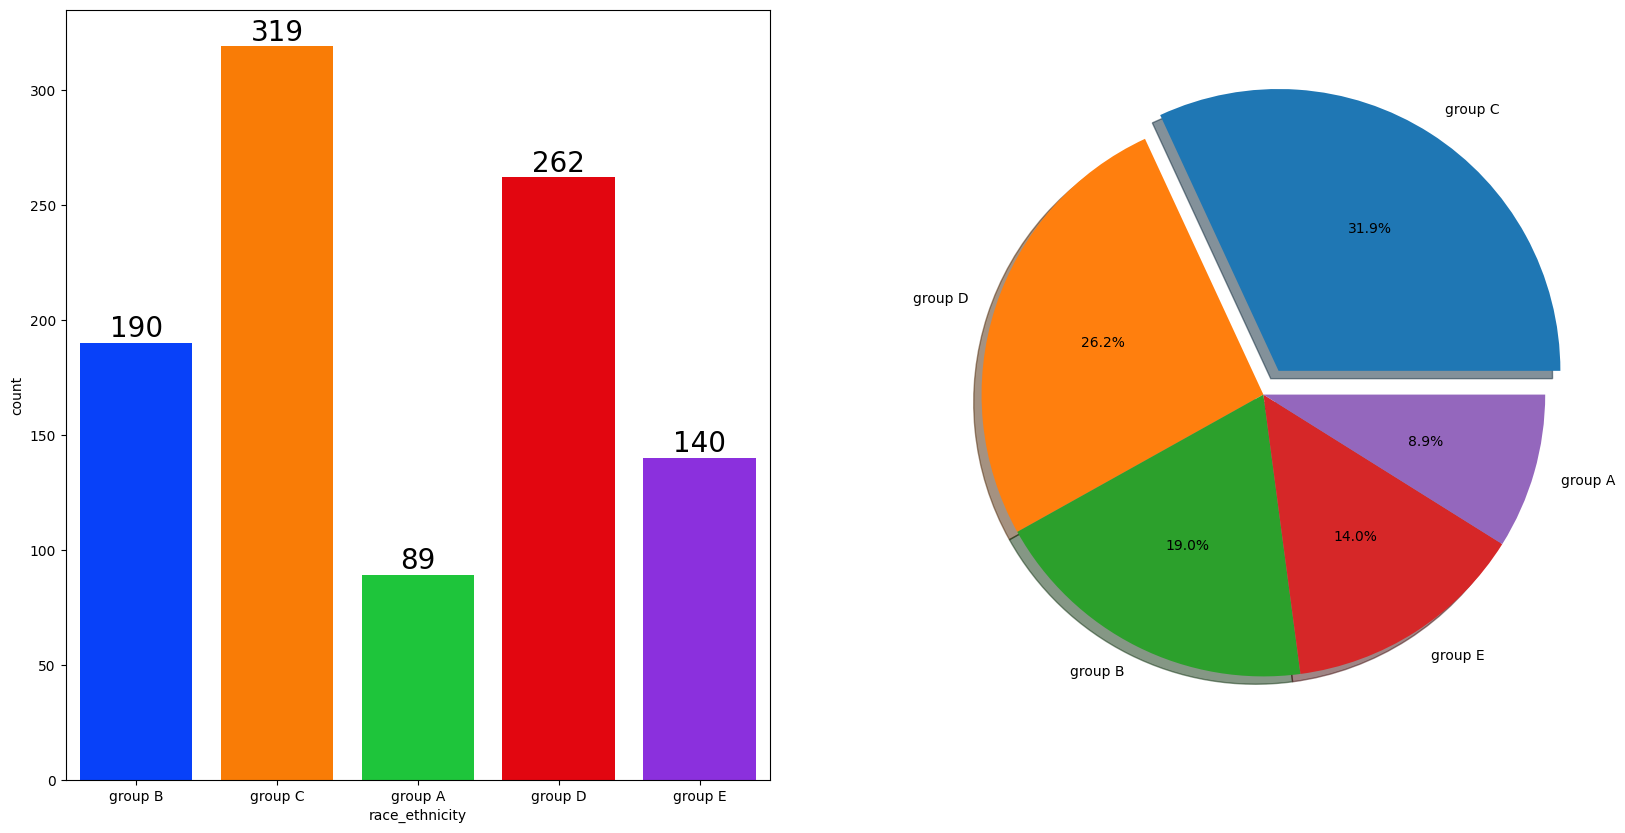

In [66]:
fig,axs=plt.subplots(1,2,figsize=(20,10))

sns.countplot(data=data,x=data['race_ethnicity'],ax=axs[0],palette='bright',saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)

plt.pie(data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Most of the students belong to group C and D

Bivariate analysis

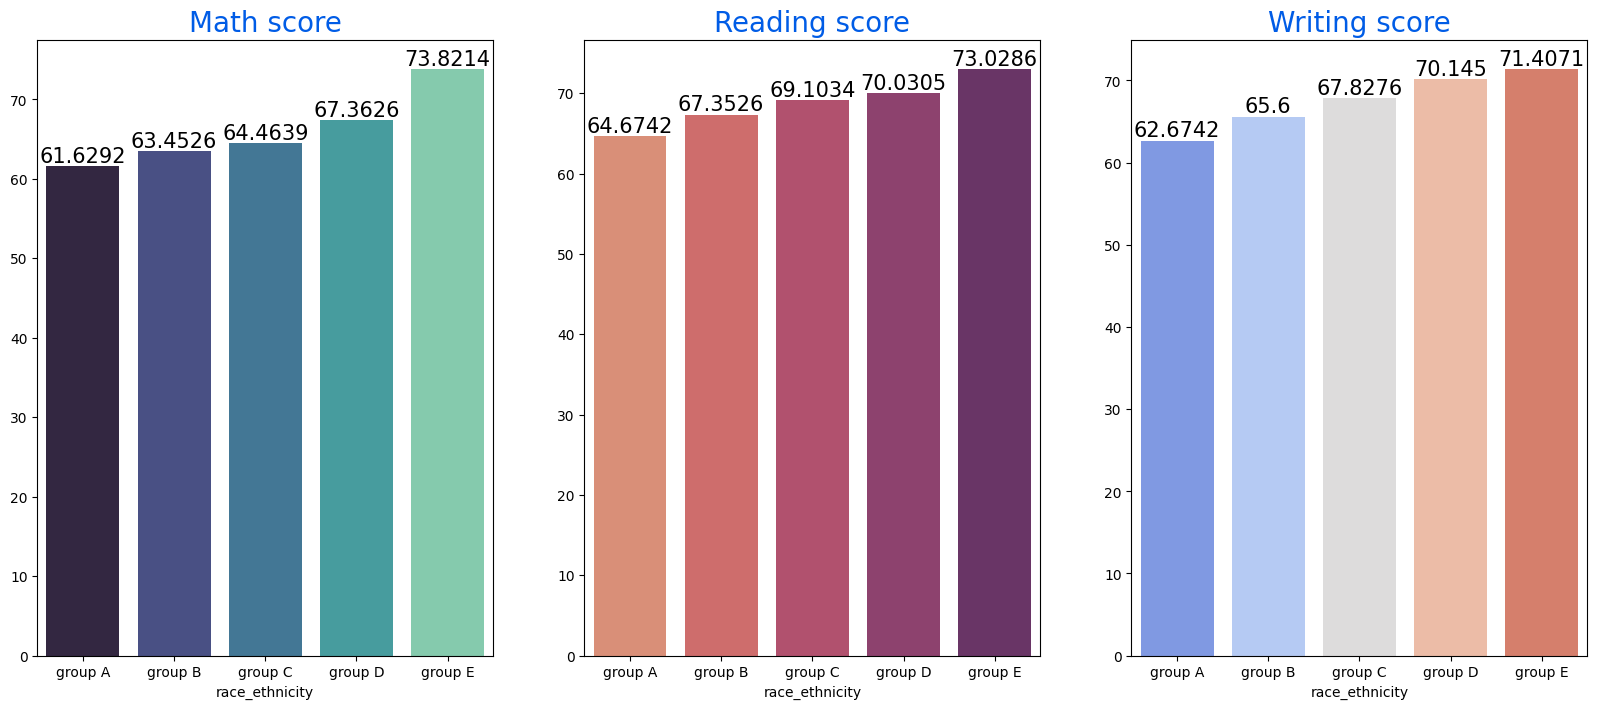

In [69]:
Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

Parental Level of Education

Univariate Analysis

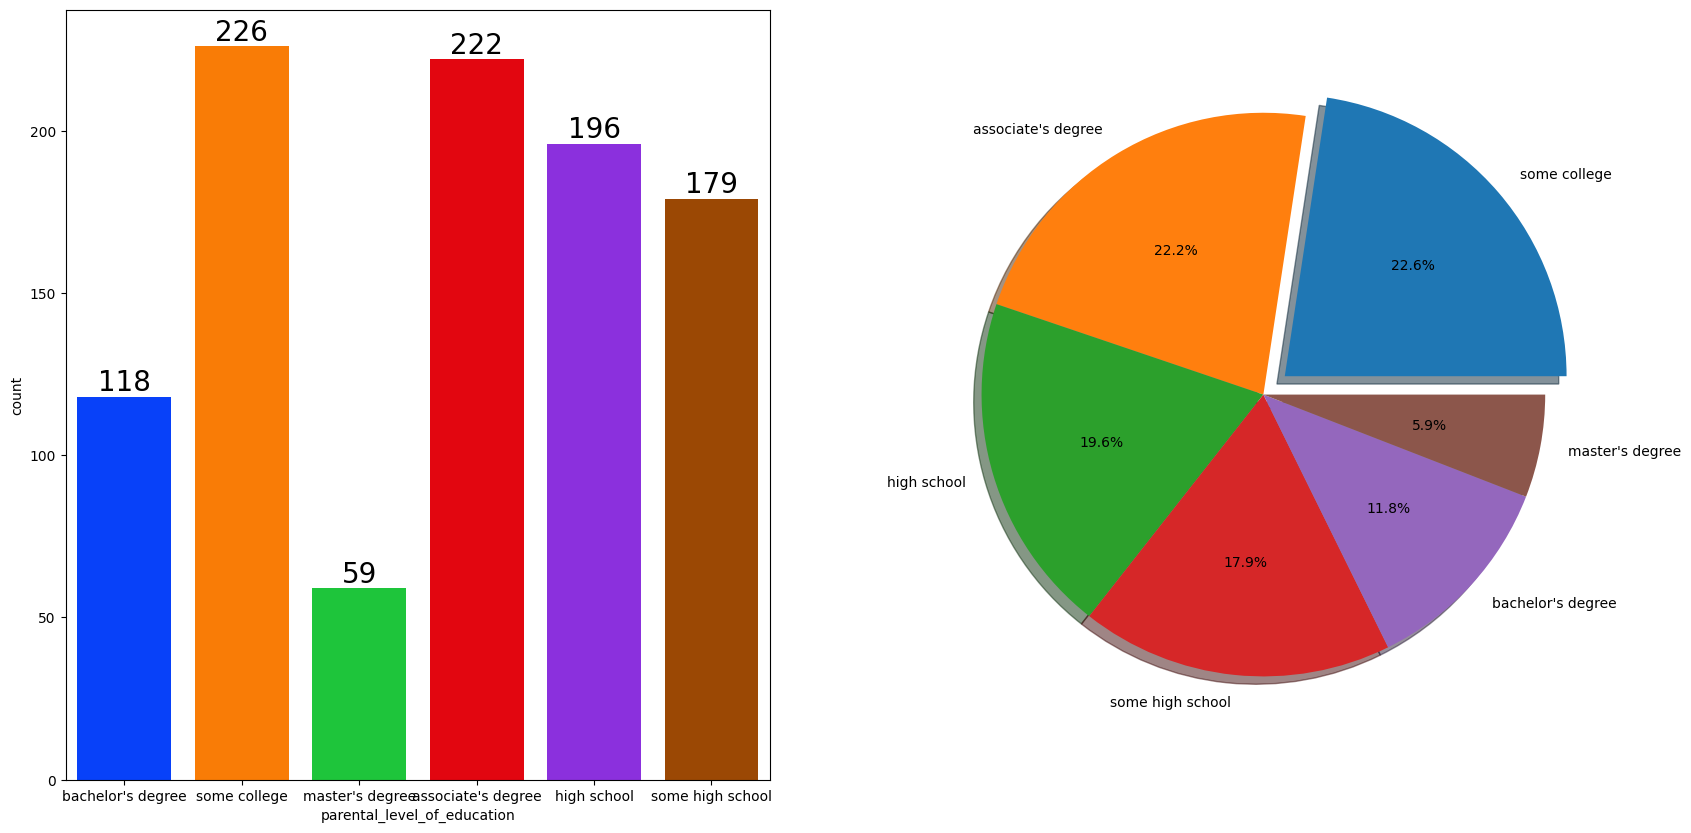

In [71]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=data,x=data['parental_level_of_education'],ax=ax[0],saturation=0.95,palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(data['parental_level_of_education'].value_counts(),labels=data['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

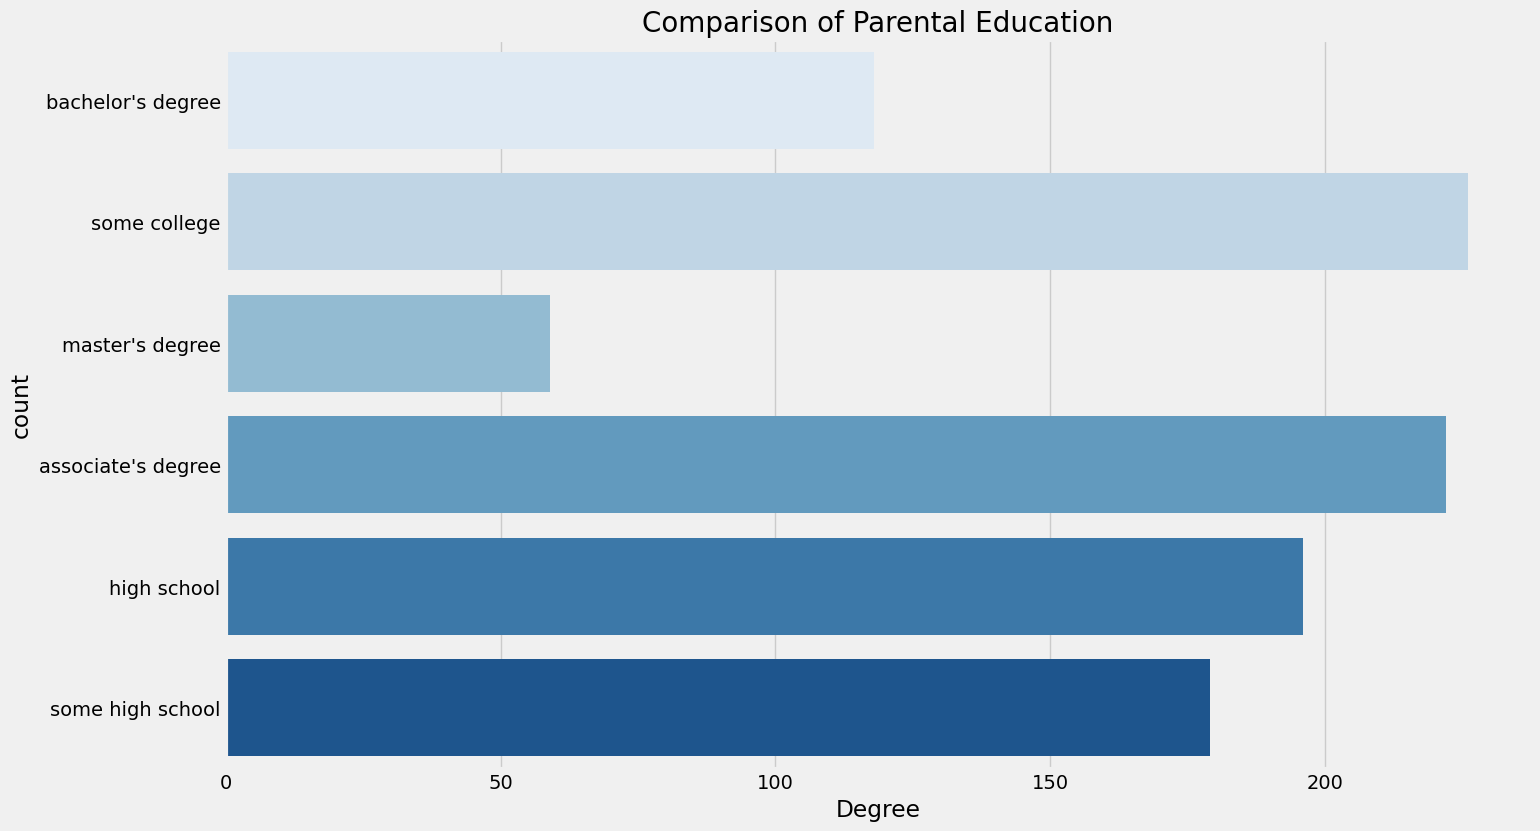

In [74]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college

Bivariate analysis

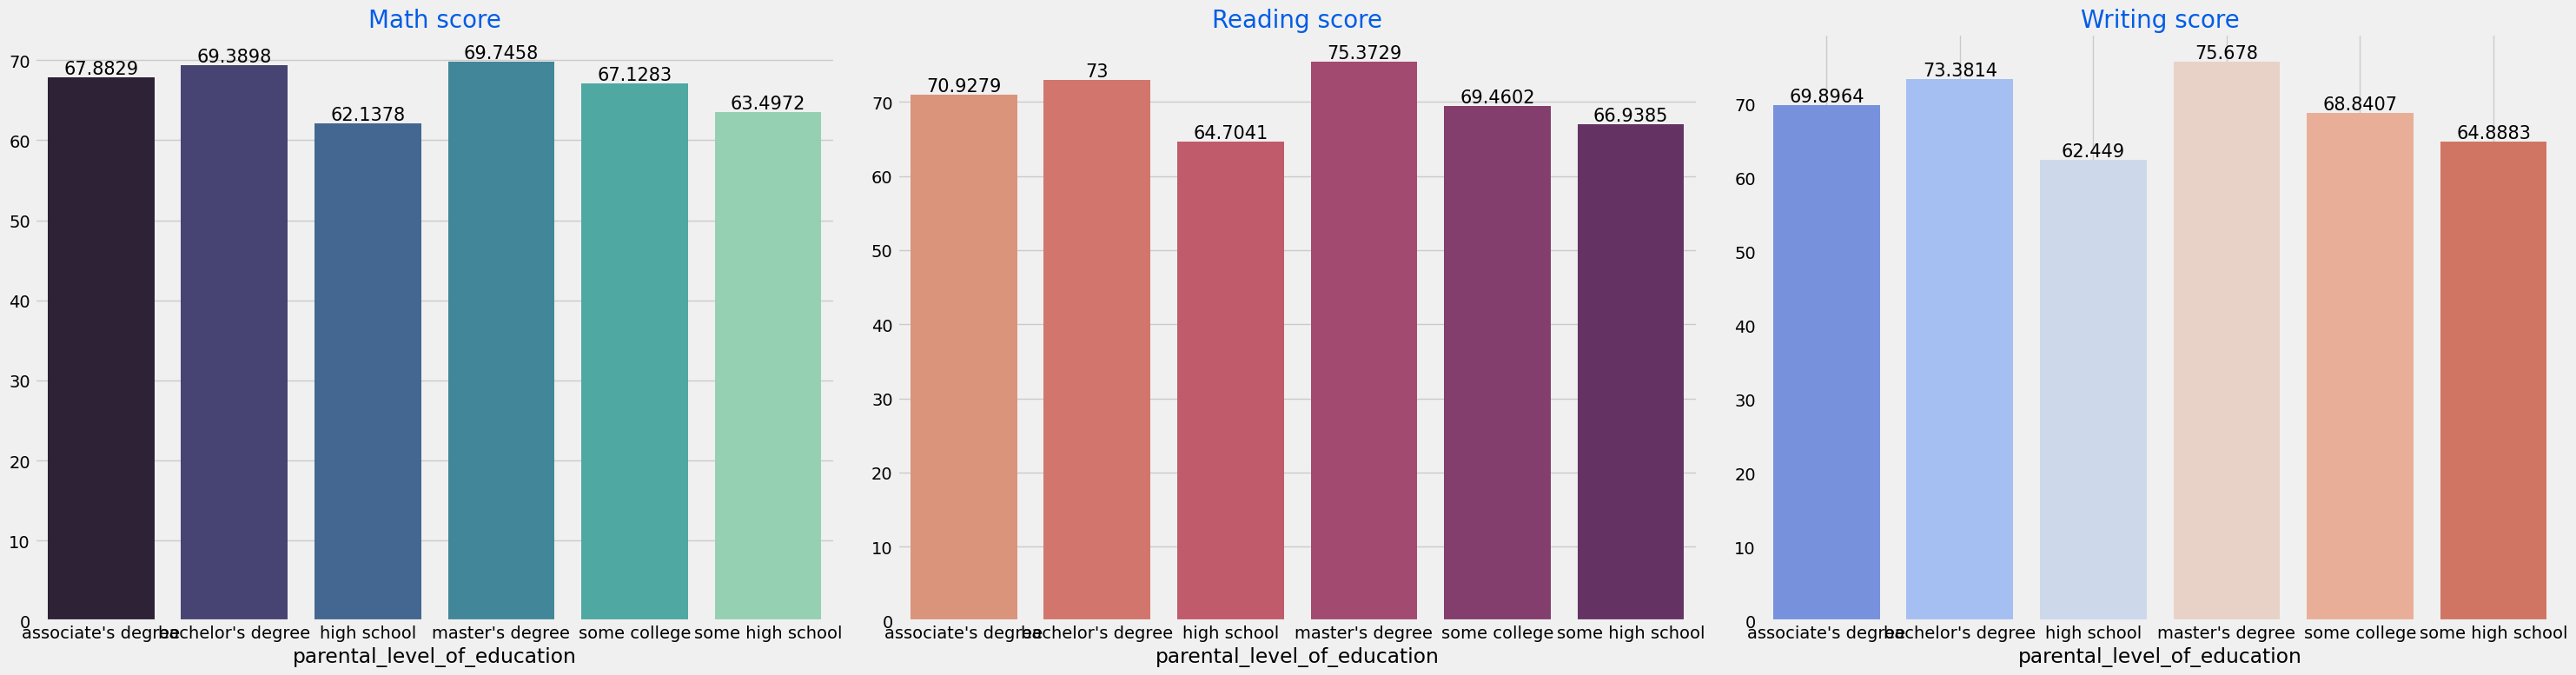

In [85]:
Group_data3=data.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(30,8))
sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.tight_layout()
plt.grid()

plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

Lunch

Univariate Analysis

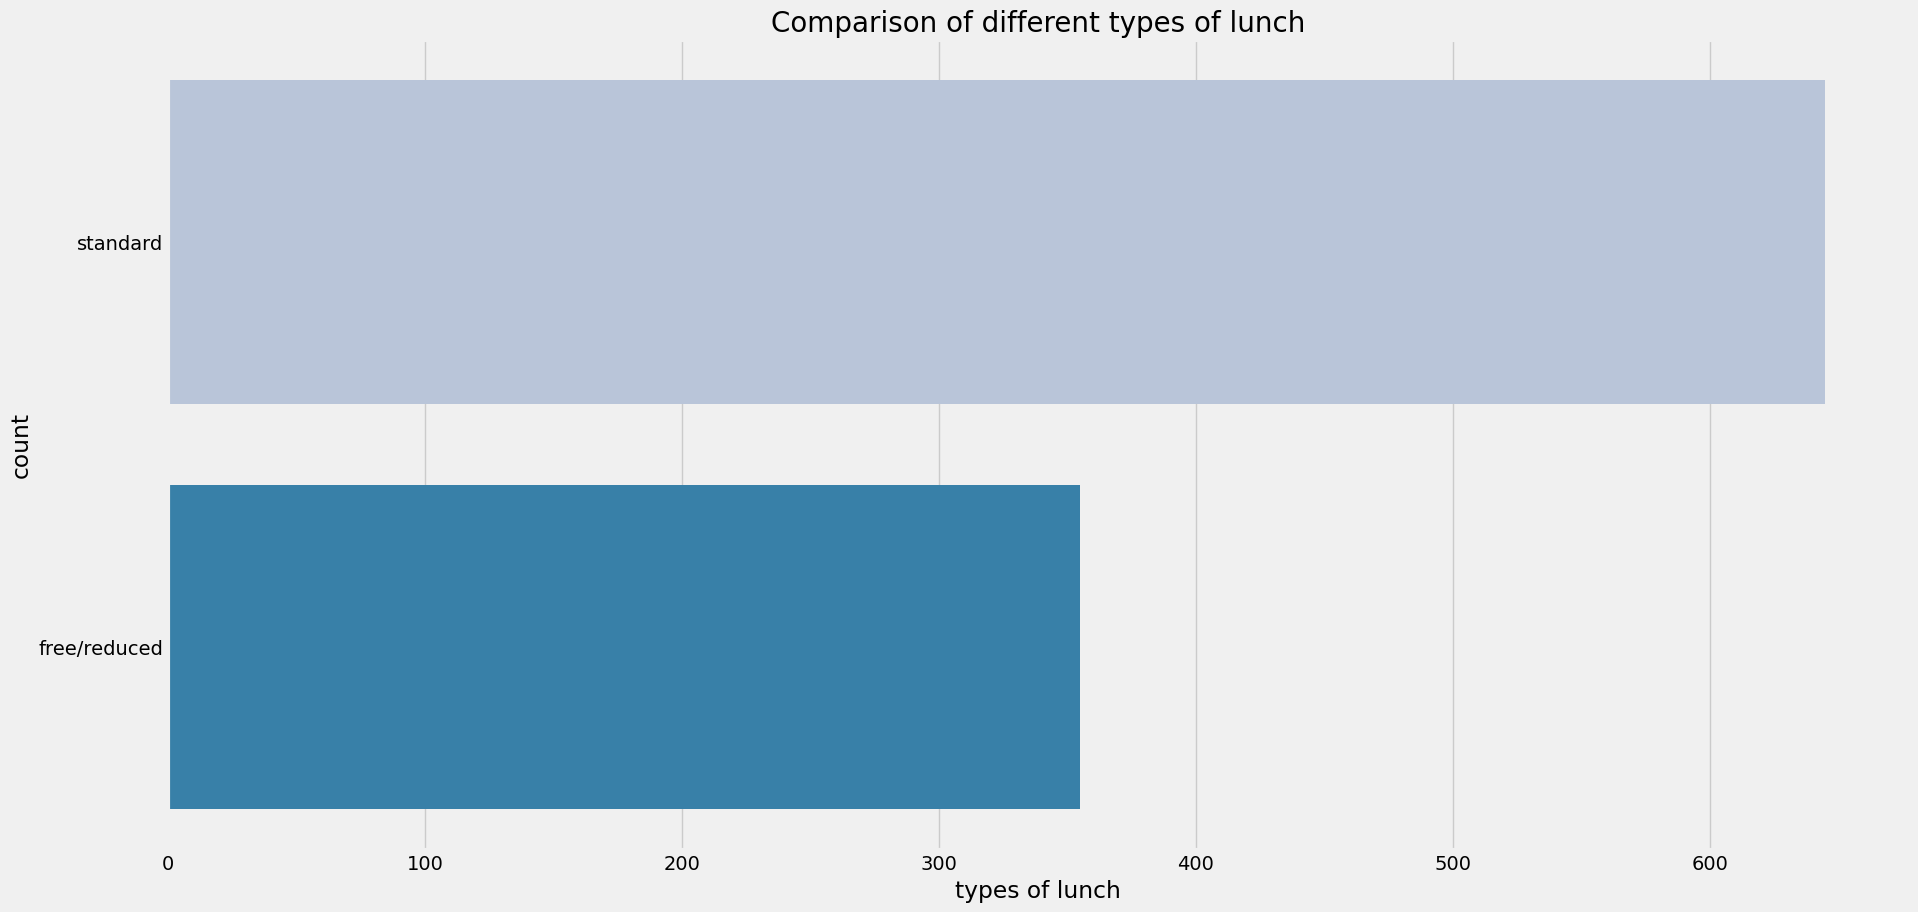

In [88]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('fivethirtyeight')
sns.countplot(data['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

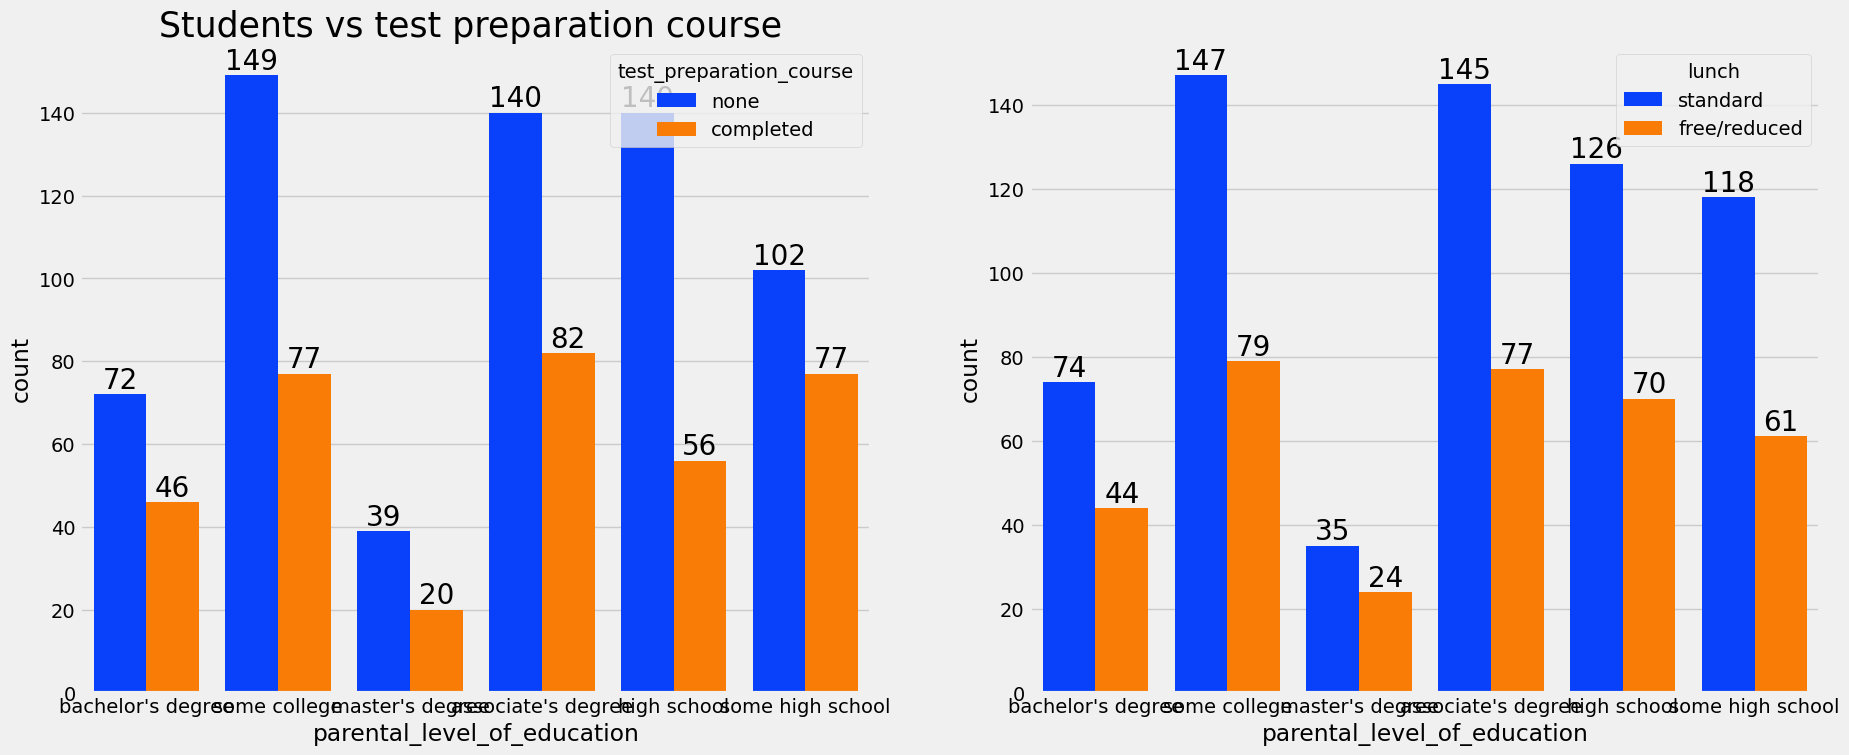

In [90]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

<Axes: xlabel='lunch', ylabel='writing_score'>

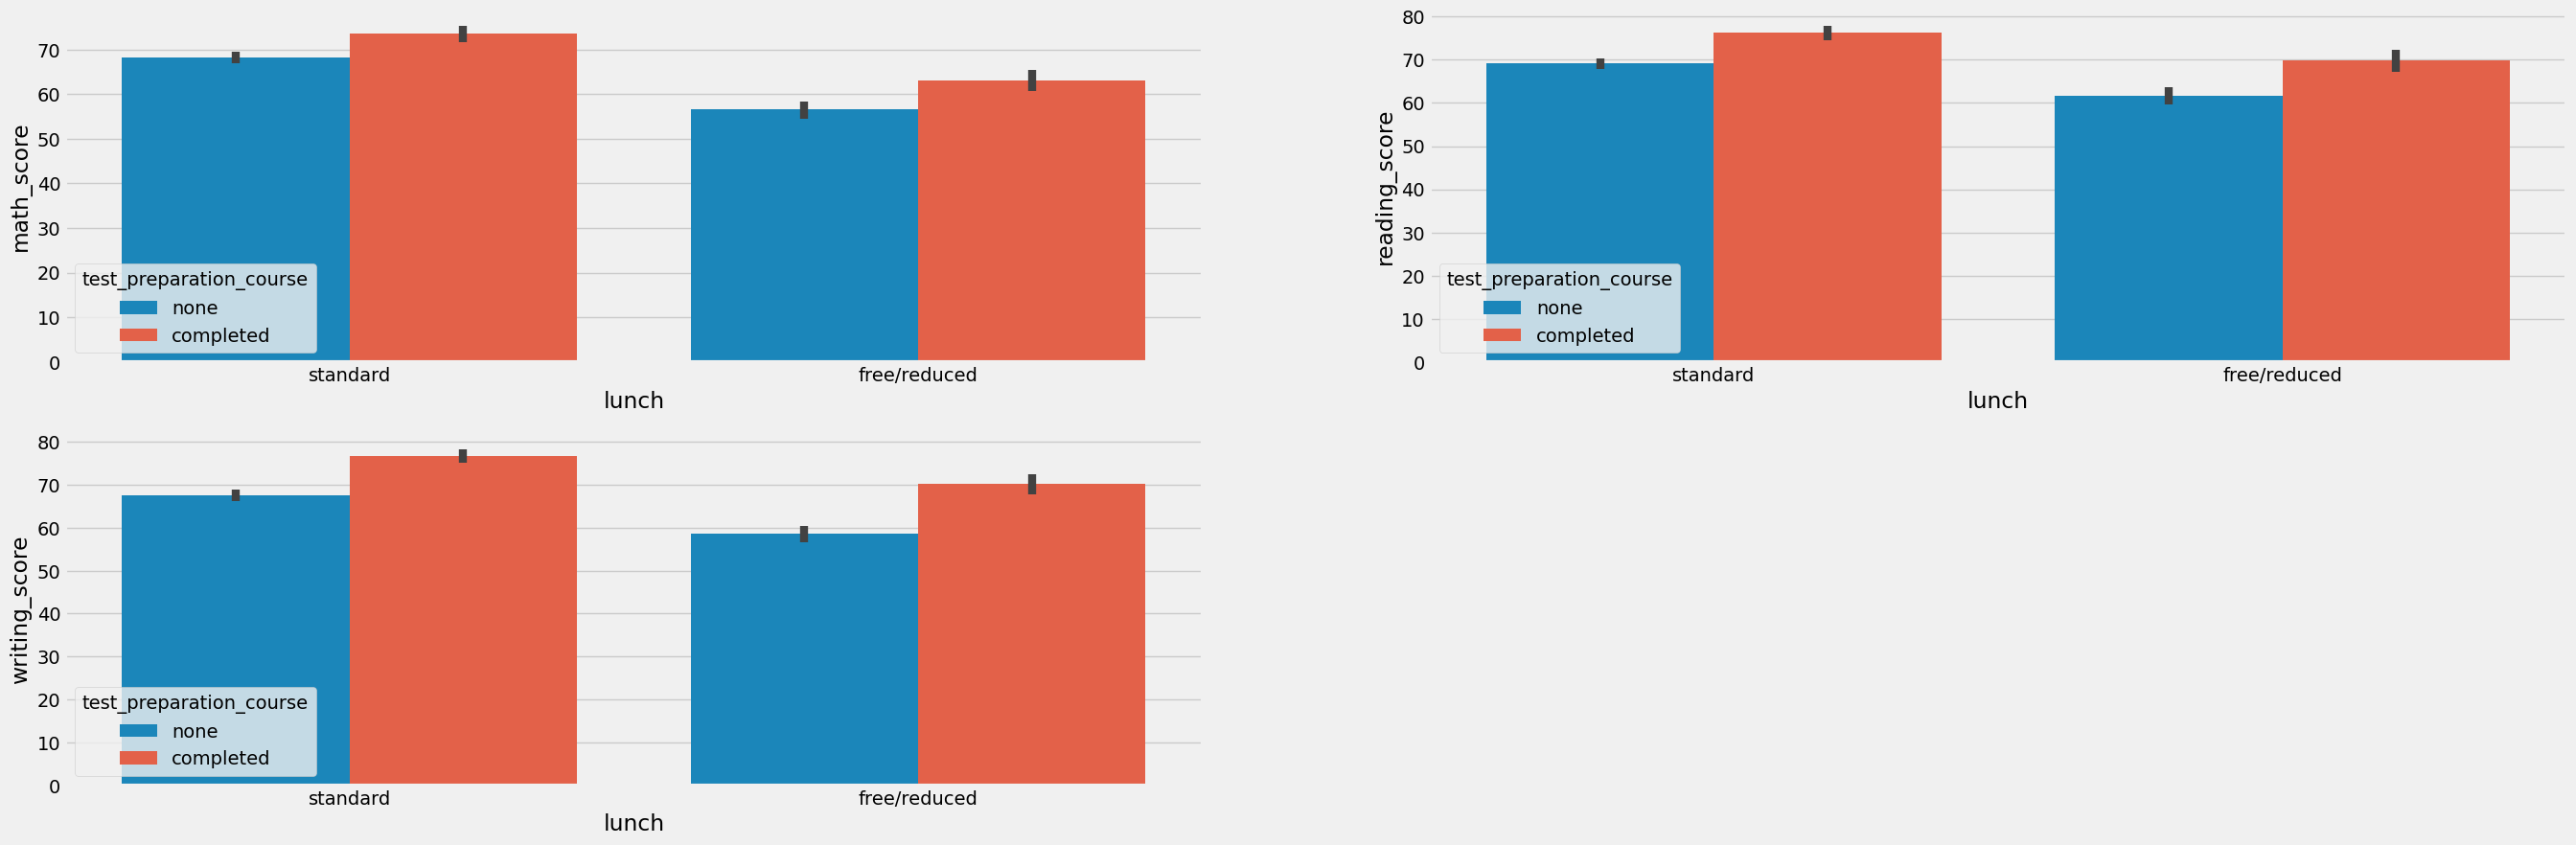

In [95]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

Checking for outliers

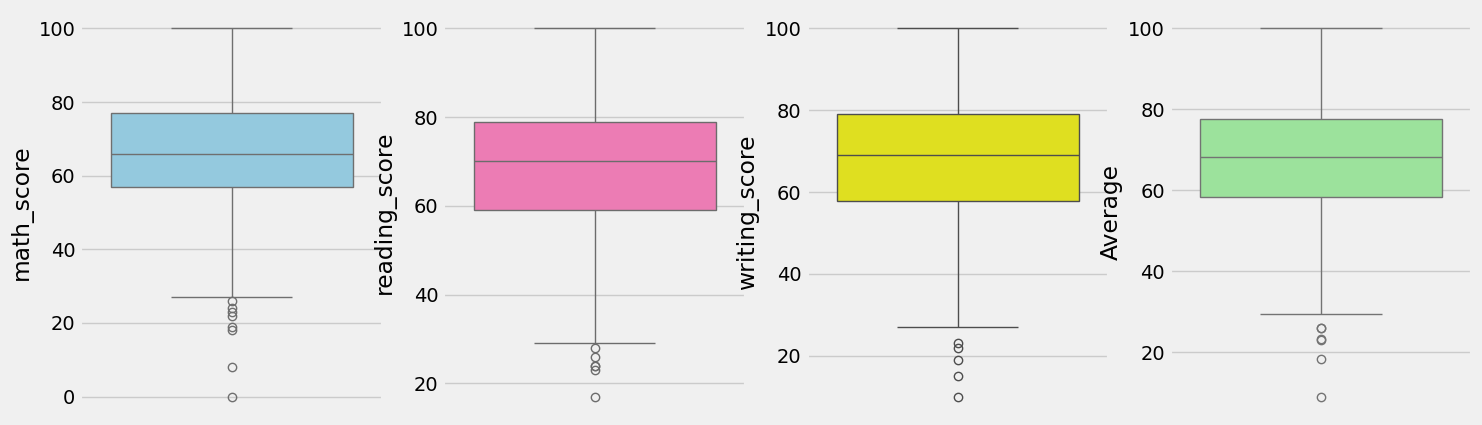

In [97]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')
plt.show()

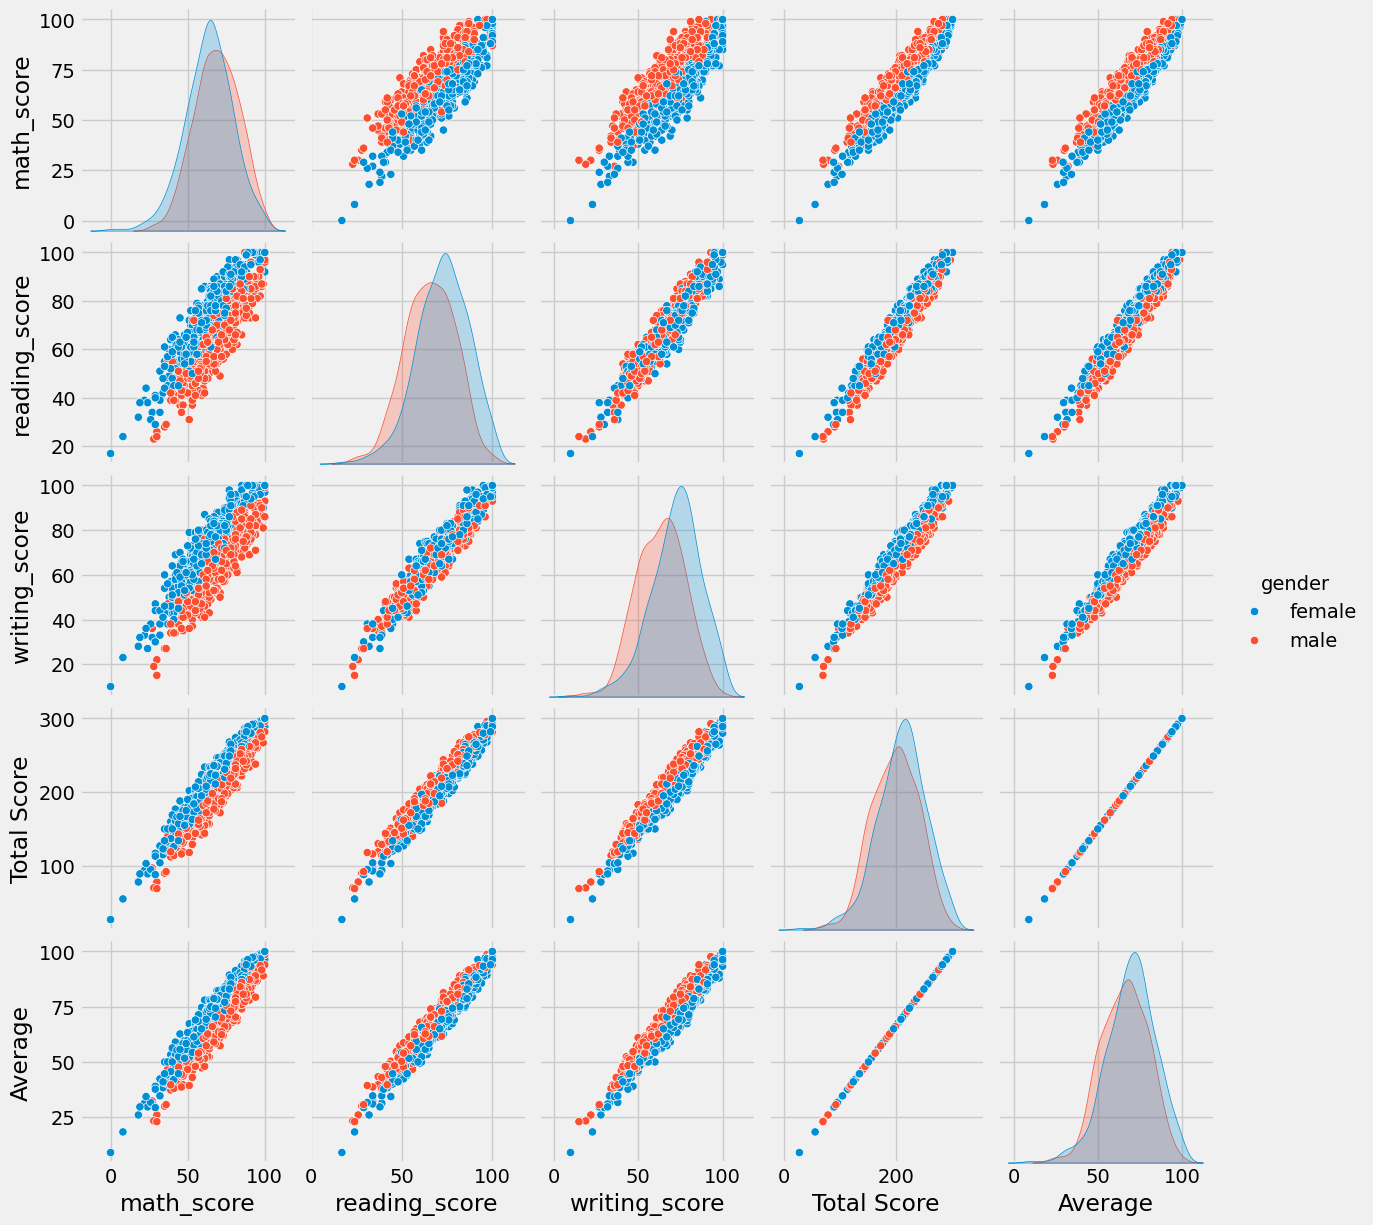

In [99]:
sns.pairplot(data,hue = 'gender')
plt.show()